# Lotka-Volterra predator-prey equations

Remember that this is a system of differential equations, specifying the rate of change for predators $L$ and prey $H$ over time, where $r$ is the intrinsic growth rate of the prey, $a$ is the predation efficiency of the predator, $b$ is the conversion efficiency of the prey to the predator, and $d$ is the death rate of the predator.

$$ \dot H = rH - aHL $$
$$ \dot L = bLH - dL $$

In this exercise we will solve and plot this equation system, as well as expand the model further. Feel free to use any available online material for working though the exercises.

The first cell contains instructions to the Python interpreter about libraries we need to carry out and plot the analysis. You don't need to change anything in this cell.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from plotnine import *
from numpy import array, linspace, column_stack
import pandas as pd
from scipy import integrate
%matplotlib inline

If you look closely, you'll see that the function `dX_dt` contains the Lotka-Volterra equations. This function returns the results of these equations at the next time step, given prey and predator population sizes. You don't need to change this function, but you may need to write a modified version for one of the exercise questions (see below).

In [2]:
def dX_dt(X, t=0):
    "Takes  vector with (prey, predator) population sizes at time t, returns how much they change at time t + 1"
    arr = array([ r*X[0]    - a*X[0]*X[1],
                b*X[0]*X[1] - d*X[1] ])
    return arr

The function below simply solves the differential equation system specified in `dX_dt`, and reformats the data for easier plotting. You don't need to change it either.

In [3]:
def solveODE(prey, predators, t, r, a, b, d):
    X0 = array([prey, predators]) # initial population sizes for prey and predators
    X = integrate.odeint(dX_dt, X0, t)
    # add time as variable to results
    Y = pd.DataFrame(column_stack((X, t)), columns = ['prey', 'predator', 'time']) 
    # re-arrange data into long format and return them
    return pd.melt(Y, id_vars=['time'], var_name = 'species', value_name = 'population size')  

This cell parameter values for the simulation plotted below. You can change them as you wish and see the results.

In [4]:
prey, predators = 10, 5
r, a, b, d = 0.5, 0.1, .1, 0.5 # parameters
t = linspace(0, 50, 50) # time from start to stop with steps in between

The next cell actually uses the two functions above to solve the equations and then plots the results. Feel free to re-run it after changing values of the parameters. It may be better to copy this code into a new cell, so that you can display the results separately, and compare them among trials, as illustrated below.

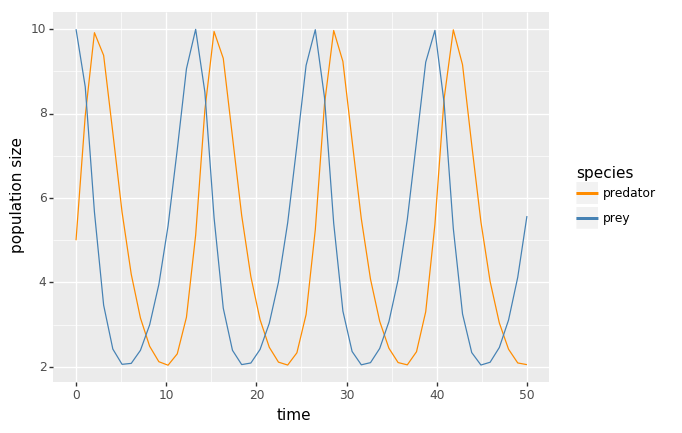

<ggplot: (283564001)>

In [5]:
# solve the equations and store results in to a variable
sim1 = solveODE(prey, predators, t, r, a, b, d) 

#plot the results
ggplot(sim1, aes(x='time', y='population size', color='species')) + \
scale_color_manual(values=('darkorange','steelblue')) + geom_line()

No we'll tweak the original parameters (decrease r to 0.5) and see what happens

In [6]:
prey, predators = 10, 5
r, a, b, d = 1, 0.1, .1, 0.5 # old parameters = 0.5, 0.1, .1, 0.5 # parameters
t = linspace(0, 50, 50) # time from start to stop with steps in between

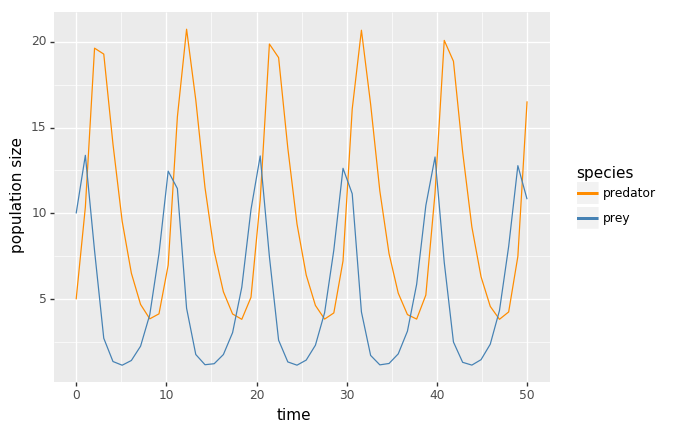

<ggplot: (-9223372036571187396)>

In [7]:
#plot the results
sim2 = solveODE(prey, predators, t, r, a, b, d) 
ggplot(sim2, aes(x='time', y='population size', color='species')) + \
scale_color_manual(values=('darkorange','steelblue')) + geom_line()

You can see that changing this parameter alters the periodicity of the cycle and the population sizes of both the predator and prey. By changing parameters in the cell above, you can explore the parameter space.

## Exercises
### 1. What happens at the equilibrium?
The Lotka-Volterra system has two equilibrium points: $\{L = 0, H = 0\}$ and $\{L = d/b, H = r/a\}$. The first one is not really interesting (everyone is extinct), but the second one. Use the `dX_dt` function to verify that these are equilibrium points. Then plot these results.

In [ ]:
r, a, b, d = 0.8, 0.2, 0.5, 0.5
(r/a, d/b), dX_dt((d/b, r/a))
ggplot(solveODE(d/b, r/a, t, r, a, b, d) , aes(x='time', y='population size', color='species')) + \
scale_color_manual(values=('darkorange','steelblue')) + geom_line()

### 2. Phase space plot
Another way of looking at the dynamics is a [phase diagram](https://en.wikipedia.org/wiki/Phase_diagram). Plot one for this system by plotting populations of predators _vs._ prey.

### 3. Can you find a set of parameters where the predator and prey go extinct?
Starting from initial conditions where both prey and predators are non-zero. What does this mean about the biological realism of the model?

### 3. Add a carrying capacity term for the prey. What changes?
Hint: You can see an example of what you should expect in the [simulation accompanying the lecture](ecoevo.shinyapps.io/predprey/).